# Comparing the performances of L1-Regularized Sparse Logistic Regression and Graph-Sparse Logistic Regression on Synthetic Data

In [1]:
%pylab inline
import pickle
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathways_df = pd.read_pickle(KEGG_path)

pathways = {pathway_id: pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0] for pathway_id in pathways_df.index.get_level_values(2)}

In [3]:
def unpack_logit_results(results):
    scores = pd.DataFrame({pathway_id: scores[0].flatten().tolist() for pathway_id, scores, chosen_genes in results})
    features = {pathway: features for pathway, scores, features in results}
    features = {key: (set(pathways[key]), set(features[key])) for key in (set(pathways.keys()) & set(features.keys()))}
    
    return scores, features

def unpack_gslr_results(results):
    scores = pd.DataFrame({pathway_id: scores for pathway_id, scores, chosen_genes in results})
    features = {pathway: features for pathway, scores, features in results}
    features = {key: (set(pathways[key]), set(features[key])) for key in (set(pathways.keys()) & set(features.keys()))}

    return scores, features

In [4]:
def recall(truth, pred):    
    return len(truth & pred) / float(len(truth))
    
def precision(truth, pred):
    return len(truth & pred) / float(len(pred))

## I. Comparing results on the original resampling synthetic data scheme

### i. Unpack results from logit and GSLR

In [5]:
logit_results = pickle.load(open('./logit/logit_results.pickle', 'rb'))
gslr_results = pickle.load(open('./gslr/GSLR_results.pickle', 'rb'))

In [6]:
logit_scores, logit_features = unpack_logit_results(logit_results)
logit_scores

,hsa00970,hsa01521,hsa01522,hsa01523,hsa01524,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
0,0.80,0.35,0.55,0.45,0.30,0.75,0.95,1.00,0.85,0.90,...,1.0,1.00,1.0,0.95,0.95,1.00,1.00,0.95,1.0,1.0
1,0.90,0.60,0.30,0.45,0.45,0.95,1.00,0.80,0.90,1.00,...,1.0,1.00,1.0,0.90,0.85,1.00,1.00,1.00,1.0,1.0
2,0.90,0.40,0.55,0.55,0.55,0.95,0.90,0.95,0.95,0.90,...,1.0,1.00,1.0,0.95,1.00,1.00,1.00,1.00,1.0,1.0
3,0.90,0.45,0.65,0.65,0.60,0.85,0.80,0.85,1.00,0.95,...,1.0,0.95,1.0,1.00,0.85,1.00,1.00,1.00,1.0,1.0
4,0.95,0.55,0.45,0.50,0.60,0.80,0.95,0.90,0.95,1.00,...,1.0,1.00,1.0,1.00,1.00,0.95,1.00,1.00,1.0,1.0
5,0.85,0.45,0.50,0.55,0.60,1.00,0.95,0.95,1.00,1.00,...,1.0,1.00,1.0,1.00,0.90,1.00,0.95,1.00,1.0,1.0
6,0.80,0.55,0.60,0.35,0.50,0.85,1.00,0.90,0.85,1.00,...,1.0,1.00,1.0,0.95,0.95,1.00,1.00,0.95,1.0,1.0
7,0.95,0.40,0.45,0.65,0.60,0.95,0.95,1.00,1.00,1.00,...,1.0,1.00,1.0,1.00,0.90,0.95,1.00,1.00,1.0,1.0
8,0.95,0.50,0.50,0.50,0.35,0.80,0.90,0.95,0.90,1.00,...,1.0,1.00,1.0,1.00,0.95,0.95,1.00,0.95,1.0,1.0
9,0.80,0.55,0.45,0.55,0.25,0.80,0.90,0.95,0.95,0.95,...,1.0,1.00,1.0,1.00,0.90,0.95,0.90,1.00,1.0,1.0


In [7]:
gslr_scores, gslr_features = unpack_gslr_results(gslr_results)
gslr_scores

,hsa00970,hsa01521,hsa01522,hsa01523,hsa01524,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
0,0.60,0.50,0.70,0.45,0.50,0.70,0.60,0.85,0.60,0.65,...,1.00,0.90,1.00,0.80,0.85,0.90,0.85,0.90,1.00,0.95
1,0.55,0.55,0.40,0.40,0.45,0.60,0.85,0.70,0.90,0.65,...,1.00,0.90,1.00,0.85,0.70,0.85,1.00,0.90,0.95,1.00
2,0.65,0.50,0.40,0.50,0.50,0.65,0.65,0.85,0.70,0.80,...,1.00,1.00,1.00,0.90,0.70,0.95,0.90,0.90,1.00,1.00
3,0.70,0.50,0.45,0.40,0.70,0.60,0.55,0.90,0.70,0.80,...,0.90,0.85,1.00,0.80,0.70,0.90,0.85,0.85,1.00,1.00
4,0.75,0.60,0.50,0.55,0.70,0.75,0.80,0.70,0.70,0.75,...,1.00,0.95,0.95,0.90,0.80,0.85,0.95,0.90,0.95,0.95
5,0.75,0.65,0.45,0.60,0.45,0.50,0.65,0.90,0.80,0.85,...,1.00,1.00,1.00,0.95,0.65,0.95,0.75,0.70,1.00,0.95
6,0.55,0.60,0.60,0.40,0.45,0.75,0.95,0.85,0.65,0.55,...,0.95,1.00,0.95,0.85,0.75,0.85,0.90,0.95,0.95,0.90
7,0.75,0.45,0.40,0.60,0.45,0.60,0.50,0.85,0.80,0.80,...,1.00,1.00,1.00,0.65,0.70,0.95,0.75,0.80,0.90,0.95
8,0.55,0.55,0.60,0.50,0.40,0.60,0.35,0.90,0.70,0.55,...,1.00,1.00,1.00,0.95,0.90,0.80,0.90,0.90,1.00,0.95
9,0.40,0.50,0.45,0.50,0.20,0.75,0.60,0.75,0.60,0.50,...,1.00,0.90,0.95,0.80,0.70,0.85,0.80,1.00,0.95,0.95


### ii. Accuracy

In [8]:
accuracies = pd.concat([pd.melt(logit_scores, value_name='logit')['logit'], pd.melt(gslr_scores, value_name='gslr')['gslr']], axis=1)
accuracies.head()

,logit,gslr
0,0.80,0.60
1,0.90,0.55
2,0.90,0.65
3,0.90,0.70
4,0.95,0.75


(0, 1)

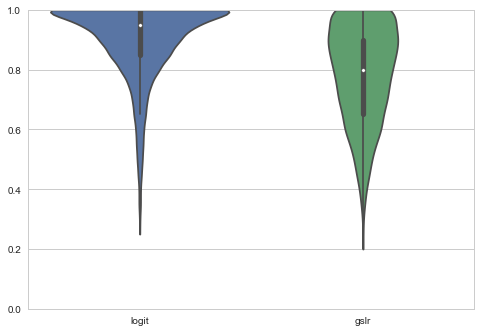

In [9]:
sns.violinplot(data=accuracies, cut=0)
plt.ylim(0, 1)

### iii. Pathway Recovery

In [10]:
logit_summary = {pathway: (recall(truth, pred), precision(truth, pred)) for pathway, (truth, pred) in logit_features.items() if len(truth) > 0}
logit_summary = pd.DataFrame(logit_summary, index=['logit_recall', 'logit_precision'])
logit_summary

,hsa00970,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,hsa03018,hsa03020,hsa03022,hsa03030,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
logit_recall,0.181818,0.181818,0.118812,0.052288,0.076023,0.054945,0.089744,0.129032,0.222222,0.194444,...,0.06015,0.100000,0.157895,0.243902,0.135135,0.144578,0.166667,0.133333,0.135593,0.064748
logit_precision,0.112150,0.071429,0.121212,0.080808,0.116071,0.053191,0.084337,0.031496,0.078125,0.070000,...,0.32000,0.147541,0.146341,0.128205,0.054348,0.187500,0.153846,0.166667,0.145455,0.243243


In [11]:
gslr_summary = {pathway: (recall(truth, pred), precision(truth, pred)) for pathway, (truth, pred) in gslr_features.items()  if len(truth) > 0}
gslr_summary = pd.DataFrame(gslr_summary, index=['gslr_recall', 'gslr_precision'])
gslr_summary

,hsa00970,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,hsa03018,hsa03020,hsa03022,hsa03030,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
gslr_recall,0.151515,0.136364,0.099010,0.117647,0.157895,0.142857,0.141026,0.290323,0.222222,0.388889,...,0.240602,0.233333,0.394737,0.365854,0.243243,0.289157,0.277778,0.233333,0.389831,0.309353
gslr_precision,0.059172,0.033520,0.052632,0.107143,0.167702,0.071429,0.070064,0.049180,0.056497,0.088608,...,0.347826,0.156716,0.115385,0.108696,0.048649,0.198347,0.125786,0.153285,0.190083,0.409524


In [12]:
recalls = pd.concat([logit_summary.loc['logit_recall'], gslr_summary.loc['gslr_recall']], axis=1)
precisions = pd.concat([logit_summary.loc['logit_precision'], gslr_summary.loc['gslr_precision']], axis=1)

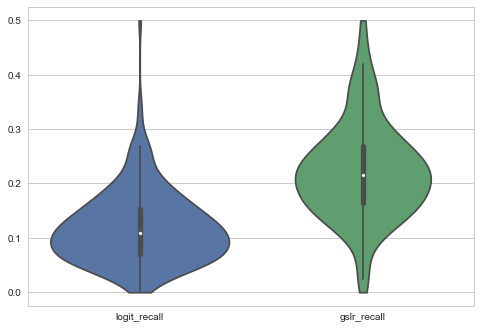

In [13]:
sns.violinplot(data=recalls, cut=0)
# plt.ylim(0, 1)

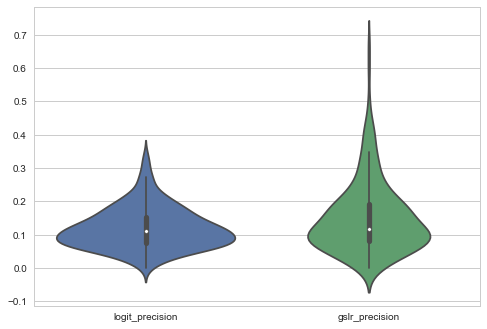

In [14]:
sns.violinplot(data=precisions)
# plt.ylim(0, 1)

## II. Comparing results on the "gaussian mixture" resampling synthetic data scheme

### i. Unpack results from logit and GSLR on "gaussian mixture" synthetic data

In [15]:
logit_gmm_results = pickle.load(open('./logit/logit_gmm_results.pickle', 'rb'))
gslr_gmm_results = pickle.load(open('./gslr/GSLR_gmm_results.pickle', 'rb'))

In [16]:
logit_gmm_scores, logit_gmm_features = unpack_logit_results(logit_gmm_results)
logit_gmm_scores

,hsa00970,hsa01521,hsa01522,hsa01523,hsa01524,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
0,1.00,0.55,0.60,0.60,0.50,1.00,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
1,1.00,0.45,0.60,0.40,0.60,1.00,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
2,0.95,0.50,0.30,0.55,0.35,1.00,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
3,1.00,0.60,0.50,0.35,0.55,0.95,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
4,1.00,0.60,0.50,0.35,0.30,1.00,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
5,0.95,0.30,0.45,0.50,0.45,1.00,1.0,0.95,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
6,1.00,0.60,0.45,0.60,0.60,0.85,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
7,1.00,0.45,0.50,0.60,0.35,1.00,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
8,1.00,0.50,0.60,0.60,0.50,1.00,1.0,0.95,1.0,1.0,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
9,1.00,0.60,0.60,0.45,0.35,1.00,1.0,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,0.95,1.0,1.0,1.0,1.0,1.0


In [17]:
gslr_gmm_scores, gslr_gmm_features = unpack_gslr_results(gslr_gmm_results)
gslr_gmm_scores

,hsa00970,hsa01521,hsa01522,hsa01523,hsa01524,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
0,0.95,0.40,0.60,0.50,0.45,0.80,1.00,0.90,0.85,0.95,...,1.0,1.00,0.95,1.00,0.95,1.00,1.00,0.95,0.95,0.95
1,0.95,0.20,0.70,0.45,0.60,0.95,0.90,0.90,1.00,0.70,...,1.0,1.00,1.00,0.95,0.95,1.00,1.00,1.00,1.00,1.00
2,0.95,0.40,0.65,0.35,0.40,0.90,0.85,0.85,0.85,0.85,...,1.0,0.95,0.95,1.00,1.00,1.00,1.00,0.95,1.00,1.00
3,0.80,0.50,0.55,0.45,0.65,0.80,1.00,0.95,0.85,0.85,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.90,1.00,1.00
4,1.00,0.55,0.45,0.50,0.35,0.90,1.00,0.90,1.00,0.95,...,1.0,1.00,1.00,1.00,0.85,1.00,0.95,1.00,1.00,1.00
5,0.80,0.35,0.50,0.50,0.40,0.85,0.95,0.95,0.90,0.80,...,1.0,1.00,0.95,1.00,0.90,0.95,1.00,1.00,1.00,0.95
6,1.00,0.70,0.45,0.50,0.60,0.80,1.00,0.90,0.95,0.95,...,1.0,1.00,1.00,1.00,0.90,0.95,1.00,0.95,0.95,0.95
7,1.00,0.30,0.45,0.40,0.30,1.00,0.90,0.95,0.90,0.95,...,1.0,0.95,1.00,0.90,1.00,1.00,0.95,1.00,1.00,0.95
8,0.90,0.45,0.60,0.70,0.55,0.85,0.90,0.80,1.00,1.00,...,1.0,0.95,1.00,0.95,0.90,1.00,1.00,1.00,1.00,1.00
9,1.00,0.25,0.55,0.35,0.55,0.80,1.00,1.00,1.00,0.95,...,1.0,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00


### ii. Accuracy

In [18]:
gmm_accuracies = pd.concat([pd.melt(logit_gmm_scores, value_name='logit')['logit'], pd.melt(gslr_gmm_scores, value_name='gslr')['gslr']], axis=1)
gmm_accuracies.head()

,logit,gslr
0,1.00,0.95
1,1.00,0.95
2,0.95,0.95
3,1.00,0.80
4,1.00,1.00


(0, 1)

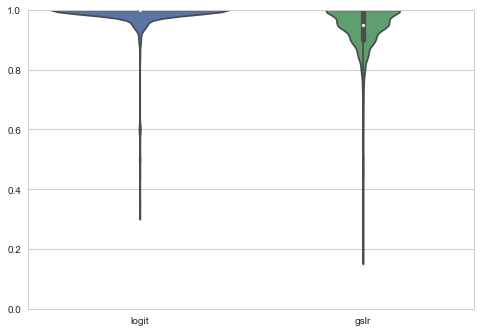

In [19]:
sns.violinplot(data=gmm_accuracies, cut=0)
plt.ylim(0, 1)

### iii. Pathway Recovery

In [20]:
logit_gmm_summary = {pathway: (recall(truth, pred), precision(truth, pred)) for pathway, (truth, pred) in logit_gmm_features.items()  if len(truth) > 0}
logit_gmm_summary = pd.DataFrame(logit_gmm_summary, index=['logit_gmm_recall', 'logit_gmm_precision'])
logit_gmm_summary

,hsa00970,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,hsa03018,hsa03020,hsa03022,hsa03030,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
logit_gmm_recall,0.30303,0.227273,0.108911,0.104575,0.093567,0.186813,0.141026,0.451613,0.355556,0.25,...,0.037594,0.166667,0.184211,0.146341,0.189189,0.120482,0.138889,0.188889,0.152542,0.043165
logit_gmm_precision,0.25641,0.129870,0.268293,0.271186,0.285714,0.236111,0.203704,0.181818,0.235294,0.25,...,0.227273,0.312500,0.233333,0.193548,0.184211,0.250000,0.222222,0.369565,0.236842,0.250000


In [21]:
gslr_gmm_summary = {pathway: (recall(truth, pred), precision(truth, pred)) for pathway, (truth, pred) in gslr_gmm_features.items()  if len(truth) > 0}
gslr_gmm_summary = pd.DataFrame(gslr_gmm_summary, index=['gslr_gmm_recall', 'gslr_gmm_precision'])
gslr_gmm_summary

,hsa00970,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,hsa03018,hsa03020,hsa03022,hsa03030,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
gslr_gmm_recall,0.560606,0.272727,0.475248,0.477124,0.491228,0.626374,0.551282,0.806452,0.688889,0.777778,...,0.285714,0.377778,0.421053,0.439024,0.432432,0.445783,0.513889,0.422222,0.610169,0.345324
gslr_gmm_precision,0.339450,0.081081,0.500000,0.646018,0.840000,0.612903,0.589041,0.165563,0.300971,0.264151,...,0.447059,0.414634,0.126984,0.130435,0.145455,0.393617,0.445783,0.463415,0.409091,0.607595


In [22]:
gmm_recalls = pd.concat([logit_gmm_summary.loc['logit_gmm_recall'], gslr_gmm_summary.loc['gslr_gmm_recall']], axis=1)
gmm_precisions = pd.concat([logit_gmm_summary.loc['logit_gmm_precision'], gslr_gmm_summary.loc['gslr_gmm_precision']], axis=1)

(0, 1)

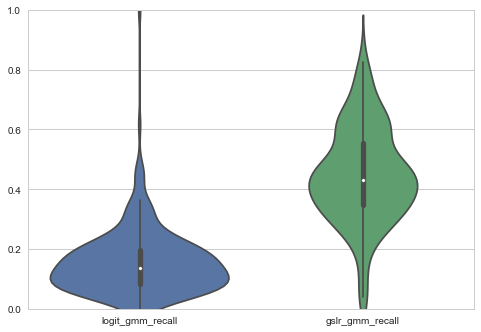

In [23]:
sns.violinplot(data=gmm_recalls)
plt.ylim(0, 1)

(0, 1)

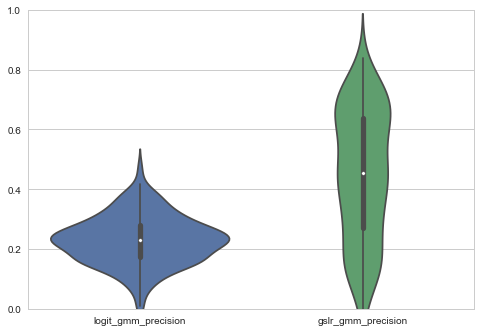

In [24]:
sns.violinplot(data=gmm_precisions)
plt.ylim(0, 1)